In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='muted', color_codes=True)

In [162]:
import warnings
import sys
import os
warnings.filterwarnings("ignore")

### Cargar el conjunto de datos

In [163]:
url = 'https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/refs/heads/main/data/processed/survey_for_ML.csv'
df = pd.read_csv(url, index_col = 'id_empleado')

**Se mantiene la variable ``puesto`` en el modelo, dado que el modelo mostró una mayor estabilidad con ella**

In [164]:
df.columns

Index(['rango_edad', 'genero', 'estado_civil', 'estudios', 'departamento',
       'area', 'puesto', 'antigüedad', 'trabajo_varias_areas', 'numero_areas',
       'carrera', 'numero_empresas', 'satisfaccion_entorno',
       'satisfaccion_puesto_actual', 'implicacion_puesto',
       'valoracion_companeros', 'satisfaccion_laboral_personal',
       'evaluaciones_desempeno_ult_ano', 'horas_trabajo_mensual',
       'horas_extras_semanales', 'salario_mensual',
       'aumento_salario_ult_dos_anos', 'porciento_aumento_salarial',
       'viajes_mensuales_laborales', 'tiempo_traslado_diario',
       'capacitaciones', 'tiempo_puesto', 'meses_ultima_promocion',
       'meses_jefe_actual', 'abandono', 'motivo_abandono_empresa',
       'mejoras_para_reduccion_rotacion', 'factores_externos_influencia',
       'factores_externos_opciones', 'comentarios_experiencia_empresa',
       'Ambiente laboral', 'Condiciones economicas generales',
       'Distancia entre casa y trabajo', 'Factores personales',
   

**Eliminamos del modelo las variables ``evaluaciones_desempeno_ult_ano`` y ``meses_jefe_actual``**

df.drop(columns=['meses_jefe_actual', 'evaluaciones_desempeno_ult_ano'], inplace=True, errors='ignore')

In [165]:
umbral_conteo = 2 # Umbral de conteo para agrupar categorías


# 1. Obtener el conteo de cada categoría
if 'puesto' in df.columns:
    conteo_categorias = df['puesto'].value_counts()

    # 2. Identificar las categorías cuyo conteo es MENOR que el umbral
    categorias_a_agrupar = conteo_categorias[conteo_categorias < umbral_conteo].index.tolist()

    # 3. Crear la nueva columna agrupada, reemplazando las categorías identificadas
    df['puesto_agrupado'] = df['puesto'].replace(categorias_a_agrupar, 'otros_puestos')
    df.drop(columns=['puesto'], inplace=True, errors='ignore')

In [166]:
df_ml = df.drop(columns=['salario_promedio_anual']) # Se elimina 'salario_promedio_anual' para evitar problemas de colinealidad
# df_ml = df.drop(columns=['salario_mensual']) # Se elimina 'rango_salario' para evitar problemas de colinealidad
df_ml.rename(columns={'Otro': 'otros_motivos'}, inplace=True)

df_ml[['antigüedad', 'tiempo_puesto', 'meses_ultima_promocion']] = (df_ml[['antigüedad', 'tiempo_puesto', 
                                                                           'meses_ultima_promocion']]/12).round(2)

if 'index' not in df_ml.columns:
    df_ml.reset_index(inplace=True)

# Eliminamos meses_jefe_actual
df_ml.drop(columns=['id_empleado', 'meses_ultima_promocion', 'numero_areas','evaluacion_desempeno_ult_ano', 'porciento_aumento_salarial', 
                    'capacitaciones'],inplace=True, errors='ignore')

col_num = df_ml.select_dtypes(include='float').columns
df_ml[col_num] = df_ml[col_num].round(2)

In [167]:
df_ml

,rango_edad,genero,estado_civil,estudios,departamento,area,antigüedad,trabajo_varias_areas,carrera,numero_empresas,satisfaccion_entorno,satisfaccion_puesto_actual,implicacion_puesto,valoracion_companeros,satisfaccion_laboral_personal,evaluaciones_desempeno_ult_ano,horas_trabajo_mensual,horas_extras_semanales,salario_mensual,aumento_salario_ult_dos_anos,viajes_mensuales_laborales,tiempo_traslado_diario,tiempo_puesto,meses_jefe_actual,abandono,motivo_abandono_empresa,mejoras_para_reduccion_rotacion,factores_externos_influencia,factores_externos_opciones,comentarios_experiencia_empresa,Ambiente laboral,Condiciones economicas generales,Distancia entre casa y trabajo,Factores personales,Falta de oportunidades de crecimiento profesional,Falta de transporte adecuado,Oferta laboral en otras empresas,otros_motivos,Responsabilidades familiares,Salario poco competitivo en el mercado,puesto_agrupado
0,40-44,Femenino,Casado/a,Licenciatura,Operaciones,Operaciones,5.83,No,Otras,8,2,1,3,No,3,No,45.0,0.0,"Entre $16,001 y $20,000",No,No viajo,3.00,5.83,48,1,Me siento frustrada porque me exigen resultado...,Considero que seria importante establecer limi...,Si,"Oferta laboral en otras empresas, Salario poco...","El ambiente laboral, los constantes cambios de...",1,1,0,0,1,0,1,0,0,1,otros_puestos
1,30-34,Masculino,Soltero/a,Posgrado,Operaciones,Operaciones,9.08,Si,Ciencias Sociales y Administracion,3,2,2,2,No,1,No,50.0,10.0,"Mas de $24,000",No,Raramente,5.00,4.00,84,1,Asumir responsabilidades sin falta de capacita...,Delimitar alcances dentro de las funsiones de ...,Si,"Oferta laboral en otras empresas, Distancia en...","Conflicto de intereses entre la direccion, fal...",1,1,1,1,1,0,1,0,0,1,Gerente
2,30-34,Masculino,Soltero/a,Licenciatura,Masa,Tecnica,2.42,No,Ciencias Exactas y Naturales,1,3,4,4,No estoy seguro(a),3,Si,50.0,1.0,"Entre $12,001 y $16,000",No,Raramente,3.00,2.42,5,1,Falta de reconocimiento y recompensa (no monet...,Reconocimiento con premios aunque no sean mone...,Si,"Oferta laboral en otras empresas, Distancia en...",En general no es malo el trabajo solo que la m...,1,1,1,1,0,1,1,0,0,1,Metrologo
3,30-34,Masculino,Soltero/a,Licenciatura,Mediciones Especiales,Tecnica,2.83,Si,Ciencias Exactas y Naturales,1,4,3,4,Si,4,No,40.0,2.5,"Entre $8,000 y $12,000",Si,Frecuentemente,3.00,0.75,9,1,Para obtener un salario mayor al que recibo.,"Mejores salarios, tomar en cuenta la experienc...",Si,"Oferta laboral en otras empresas, Condiciones ...",El ambiente laboral me agrada bastante y creo ...,0,1,0,0,1,0,1,0,0,0,Metrologo
4,45-49,Femenino,Soltero/a,Licenciatura,Tecnica,Tecnica,21.17,Si,Ingenieria,0,3,5,5,No estoy seguro(a),4,No,48.0,4.0,"Mas de $24,000",No,Frecuentemente,2.00,6.00,72,0,NaN,Mejoras en los salarios,No,NaN,NaN,0,0,0,0,0,0,0,0,0,0,Gerente
5,30-34,Masculino,Soltero/a,Licenciatura,Comercial,Comercial,2.83,Si,Ingenieria,1,5,5,5,Si,4,Si,41.0,0.0,"Entre $8,000 y $12,000",Si,Frecuentemente,1.50,2.33,22,0,NaN,"Mejores salarios, definicion de funciones y re...",No,NaN,NaN,0,0,0,0,0,0,0,0,0,0,Asesor comercial
6,25-29,Masculino,Soltero/a,Licenciatura,Masa,Tecnica,0.67,No,Ingenieria,2,4,5,4,Si,4,Si,48.0,0.0,"Entre $12,001 y $16,000",Si,No viajo,3.00,0.67,8,0,NaN,Contratacion de personal competente,No,NaN,NaN,0,0,0,0,0,0,0,0,0,0,Metrologo
7,45-49,Femenino,Soltero/a,Licenciatura,Calidad,Calidad,21.00,Si,Ingenieria,3,4,5,5,Si,4,No,48.0,3.0,"Mas de $24,000",No,Raramente,3.25,7.00,60,0,NaN,Mejor observacion en el proceso de contratacio...,Si,"Responsabilidades familiares, Condiciones econ...",En general estoy agusto con las actividades qu...,0,1,0,0,0,0,0,0,1,0,Gerente
8,40-44,Masculino,Casado/a,Tecnico,Masa,Tecnica,9.92,No,Otras,4,5,5,5,Si,4,Si,47.0,0.0,"Entre $16,001 y $20,000",No,Frecuentemente,2.00,9.92,9,0,NaN,Mas prestaciones,No,NaN,Ninguna,0,0,0,0,0,0,0,0,0,0,Metrologo
9,30-34,Masculino,Soltero/a,Licenciatura,Kaye,Tecnica,3.00,Si,Ingenieria,3,5,5,5,Si,4,No,48.0,1.0,"Entre $12,001 y $16,000",Si,Raramente,5.00,0.67,36,1,Por crecimiento profesi

In [168]:
# Se elimina la columna 'factores_externos_opciones' y se asigna a un df distinto con el objetivo de hacer un mapeo por separado,
# dado que es una columna de tipo selección múltiple
factores_externos = df_ml[['factores_externos_opciones']].copy()
df_ml.drop(columns=['factores_externos_opciones'], inplace=True, errors='ignore')

In [169]:
df_ml.drop(columns=['motivo_abandono_empresa', 'mejoras_para_reduccion_rotacion', 'comentarios_experiencia_empresa', 'departamento'],
           inplace=True, errors='ignore')

In [170]:
df_ml.select_dtypes(include='number')


,antigüedad,numero_empresas,satisfaccion_entorno,satisfaccion_puesto_actual,implicacion_puesto,satisfaccion_laboral_personal,horas_trabajo_mensual,horas_extras_semanales,tiempo_traslado_diario,tiempo_puesto,meses_jefe_actual,abandono,Ambiente laboral,Condiciones economicas generales,Distancia entre casa y trabajo,Factores personales,Falta de oportunidades de crecimiento profesional,Falta de transporte adecuado,Oferta laboral en otras empresas,otros_motivos,Responsabilidades familiares,Salario poco competitivo en el mercado
0,5.83,8,2,1,3,3,45.0,0.0,3.00,5.83,48,1,1,1,0,0,1,0,1,0,0,1
1,9.08,3,2,2,2,1,50.0,10.0,5.00,4.00,84,1,1,1,1,1,1,0,1,0,0,1
2,2.42,1,3,4,4,3,50.0,1.0,3.00,2.42,5,1,1,1,1,1,0,1,1,0,0,1
3,2.83,1,4,3,4,4,40.0,2.5,3.00,0.75,9,1,0,1,0,0,1,0,1,0,0,0
4,21.17,0,3,5,5,4,48.0,4.0,2.00,6.00,72,0,0,0,0,0,0,0,0,0,0,0
5,2.83,1,5,5,5,4,41.0,0.0,1.50,2.33,22,0,0,0,0,0,0,0,0,0,0,0
6,0.67,2,4,5,4,4,48.0,0.0,3.00,0.67,8,0,0,0,0,0,0,0,0,0,0,0
7,21.00,3,4,5,5,4,48.0,3.0,3.25,7.00,60,0,0,1,0,0,0,0,0,0,1,0
8,9.92,4,5,5,5,4,47.0,0.0,2.00,9.92,9,0,0,0,0,0,0,0,0,0,0,0
9,3.00,3,5,5,5,4,48.0,1.0,5.00,0.67,36,1,0,1,1,0,0,0,0,0,1,0


In [171]:
df_ml.drop(columns=['antigüedad'], inplace=True, errors='ignore')

In [172]:
df_ml.drop(columns=['numero_empresas'], inplace=True, errors='ignore')

In [173]:
df_ml.drop(columns=['meses_jefe_actual'], inplace=True, errors='ignore')

In [188]:
df_ml.columns

Index(['rango_edad', 'genero', 'estado_civil', 'estudios', 'area',
       'trabajo_varias_areas', 'carrera', 'satisfaccion_entorno',
       'satisfaccion_puesto_actual', 'implicacion_puesto',
       'valoracion_companeros', 'satisfaccion_laboral_personal',
       'evaluaciones_desempeno_ult_ano', 'horas_trabajo_mensual',
       'horas_extras_semanales', 'salario_mensual',
       'aumento_salario_ult_dos_anos', 'viajes_mensuales_laborales',
       'tiempo_traslado_diario', 'tiempo_puesto', 'abandono',
       'factores_externos_influencia', 'Ambiente laboral',
       'Condiciones economicas generales', 'Distancia entre casa y trabajo',
       'Factores personales',
       'Falta de oportunidades de crecimiento profesional',
       'Falta de transporte adecuado', 'Oferta laboral en otras empresas',
       'otros_motivos', 'Responsabilidades familiares',
       'Salario poco competitivo en el mercado', 'puesto_agrupado'],
      dtype='object')

### Creación del árbol de decisión

In [174]:
# Preprocesamiento
from sklearn.model_selection import train_test_split # Para la división inicial
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Escalado y Codificación
from sklearn.compose import ColumnTransformer # Para aplicar transformaciones a diferentes columnas
from sklearn.pipeline import Pipeline # Para encadenar pasos

# Modelado y Evaluación
from sklearn.tree import DecisionTreeClassifier # Modelo
from sklearn.model_selection import cross_val_score, cross_validate # Para Validación Cruzada
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report # Métricas de evaluación

# Visualización del árbol 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configuración para visualización 
%matplotlib inline 
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

In [175]:
df_ml.head(5)

,rango_edad,genero,estado_civil,estudios,area,trabajo_varias_areas,carrera,satisfaccion_entorno,satisfaccion_puesto_actual,implicacion_puesto,valoracion_companeros,satisfaccion_laboral_personal,evaluaciones_desempeno_ult_ano,horas_trabajo_mensual,horas_extras_semanales,salario_mensual,aumento_salario_ult_dos_anos,viajes_mensuales_laborales,tiempo_traslado_diario,tiempo_puesto,abandono,factores_externos_influencia,Ambiente laboral,Condiciones economicas generales,Distancia entre casa y trabajo,Factores personales,Falta de oportunidades de crecimiento profesional,Falta de transporte adecuado,Oferta laboral en otras empresas,otros_motivos,Responsabilidades familiares,Salario poco competitivo en el mercado,puesto_agrupado
0,40-44,Femenino,Casado/a,Licenciatura,Operaciones,No,Otras,2,1,3,No,3,No,45.0,0.0,"Entre $16,001 y $20,000",No,No viajo,3.0,5.83,1,Si,1,1,0,0,1,0,1,0,0,1,otros_puestos
1,30-34,Masculino,Soltero/a,Posgrado,Operaciones,Si,Ciencias Sociales y Administracion,2,2,2,No,1,No,50.0,10.0,"Mas de $24,000",No,Raramente,5.0,4.00,1,Si,1,1,1,1,1,0,1,0,0,1,Gerente
2,30-34,Masculino,Soltero/a,Licenciatura,Tecnica,No,Ciencias Exactas y Naturales,3,4,4,No estoy seguro(a),3,Si,50.0,1.0,"Entre $12,001 y $16,000",No,Raramente,3.0,2.42,1,Si,1,1,1,1,0,1,1,0,0,1,Metrologo
3,30-34,Masculino,Soltero/a,Licenciatura,Tecnica,Si,Ciencias Exactas y Naturales,4,3,4,Si,4,No,40.0,2.5,"Entre $8,000 y $12,000",Si,Frecuentemente,3.0,0.75,1,Si,0,1,0,0,1,0,1,0,0,0,Metrologo
4,45-49,Femenino,Soltero/a,Licenciatura,Tecnica,Si,Ingenieria,3,5,5,No estoy seguro(a),4,No,48.0,4.0,"Mas de $24,000",No,Frecuentemente,2.0,6.00,0,No,0,0,0,0,0,0,0,0,0,0,Gerente


In [176]:
# Manejo de variables binarias 'Si'/'No' (mapear a 1/0)
# Identificamos columnas binarias que son 'Si'/'No'
columnas_binarias_sino = ['trabajo_varias_areas', 'evaluaciones_desempeno_ult_ano', 
                          'aumento_salario_ult_dos_anos', 'factores_externos_influencia'] 
mapeo_sino = {'Si': 1, 'No': 0}

opciones_posibles = [
    'Oferta laboral en otras empresas',
    'Distancia entre casa y trabajo',
    'Falta de transporte adecuado',
    'Salario poco competitivo en el mercado',
    'Responsabilidades familiares',
    'Condiciones economicas generales',
    'Falta de oportunidades de crecimiento profesional',
    'Ambiente laboral',
    'Factores personales',
    'otros_motivos'
]


for col in columnas_binarias_sino:
    if col in df_ml.columns:
        df_ml[col] = df_ml[col].map(mapeo_sino)
        # Manejar posibles NaNs si ocurren después del mapeo, ej: 

columnas_binarias_sino.extend(opciones_posibles)        
        
df_ml[col] = df_ml[col].fillna(0)

In [177]:
columnas_binarias_sino

['trabajo_varias_areas',
 'evaluaciones_desempeno_ult_ano',
 'aumento_salario_ult_dos_anos',
 'factores_externos_influencia',
 'Oferta laboral en otras empresas',
 'Distancia entre casa y trabajo',
 'Falta de transporte adecuado',
 'Salario poco competitivo en el mercado',
 'Responsabilidades familiares',
 'Condiciones economicas generales',
 'Falta de oportunidades de crecimiento profesional',
 'Ambiente laboral',
 'Factores personales',
 'otros_motivos']

In [178]:
df_ml.select_dtypes(include='number')

,trabajo_varias_areas,satisfaccion_entorno,satisfaccion_puesto_actual,implicacion_puesto,satisfaccion_laboral_personal,evaluaciones_desempeno_ult_ano,horas_trabajo_mensual,horas_extras_semanales,aumento_salario_ult_dos_anos,tiempo_traslado_diario,tiempo_puesto,abandono,factores_externos_influencia,Ambiente laboral,Condiciones economicas generales,Distancia entre casa y trabajo,Factores personales,Falta de oportunidades de crecimiento profesional,Falta de transporte adecuado,Oferta laboral en otras empresas,otros_motivos,Responsabilidades familiares,Salario poco competitivo en el mercado
0,0,2,1,3,3,0,45.0,0.0,0,3.00,5.83,1,1,1,1,0,0,1,0,1,0,0,1
1,1,2,2,2,1,0,50.0,10.0,0,5.00,4.00,1,1,1,1,1,1,1,0,1,0,0,1
2,0,3,4,4,3,1,50.0,1.0,0,3.00,2.42,1,1,1,1,1,1,0,1,1,0,0,1
3,1,4,3,4,4,0,40.0,2.5,1,3.00,0.75,1,1,0,1,0,0,1,0,1,0,0,0
4,1,3,5,5,4,0,48.0,4.0,0,2.00,6.00,0,0,0,0,0,0,0,0,0,0,0,0
5,1,5,5,5,4,1,41.0,0.0,1,1.50,2.33,0,0,0,0,0,0,0,0,0,0,0,0
6,0,4,5,4,4,1,48.0,0.0,1,3.00,0.67,0,0,0,0,0,0,0,0,0,0,0,0
7,1,4,5,5,4,0,48.0,3.0,0,3.25,7.00,0,1,0,1,0,0,0,0,0,0,1,0
8,0,5,5,5,4,1,47.0,0.0,0,2.00,9.92,0,0,0,0,0,0,0,0,0,0,0,0
9,1,5,5,5,4,0,48.0,1.0,1,5.00,0.67,1,1,0,1,1,0,0,0,0,0,1,0


In [179]:
# Separar Features (X) y Target (y) 

X = df_ml.drop(columns='abandono')
y = df_ml['abandono']

print("\nDimensiones de X para división inicial:", X.shape)
print("Dimensiones de y para división inicial:", y.shape)


Dimensiones de X para división inicial: (41, 32)
Dimensiones de y para división inicial: (41,)


In [180]:
#División Train/Test Inicial ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify=y es útil con datasets desbalanceados

print("\nDimensiones después de la división inicial:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Verificar distribución de clases en train/test si usaste stratify
print("\nDistribución de clases en y_train:\n", y_train.value_counts(normalize=True))
print("\nDistribución de clases en y_test:\n", y_test.value_counts(normalize=True))


Dimensiones después de la división inicial:
X_train: (28, 32), y_train: (28,)
X_test: (13, 32), y_test: (13,)

Distribución de clases en y_train:
 abandono
1    0.5
0    0.5
Name: proportion, dtype: float64

Distribución de clases en y_test:
 abandono
1    0.538462
0    0.461538
Name: proportion, dtype: float64


In [181]:
# Definir los Tipos de Columnas para el Preprocesamiento en Pipeline
# Excluir columnas que ya son binarias 0/1 ya manejadas
columnas_numericas_1 = X_train.select_dtypes(include=np.number).columns.tolist()
columnas_numericas = [x for x in columnas_numericas_1 if x not in columnas_binarias_sino]

# Identificar las columnas categóricas que necesitan OHE
columnas_categoricas_ohe = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


print(f"\nColumnas numéricas para escalar: {sorted(columnas_numericas)}")
print(f"Columnas categóricas para OHE: {sorted(columnas_categoricas_ohe)}")
print(f"Columnas binarias 0/1 a pasar: {sorted(columnas_binarias_sino)}")


Columnas numéricas para escalar: ['horas_extras_semanales', 'horas_trabajo_mensual', 'implicacion_puesto', 'satisfaccion_entorno', 'satisfaccion_laboral_personal', 'satisfaccion_puesto_actual', 'tiempo_puesto', 'tiempo_traslado_diario']
Columnas categóricas para OHE: ['area', 'carrera', 'estado_civil', 'estudios', 'genero', 'puesto_agrupado', 'rango_edad', 'salario_mensual', 'valoracion_companeros', 'viajes_mensuales_laborales']
Columnas binarias 0/1 a pasar: ['Ambiente laboral', 'Condiciones economicas generales', 'Distancia entre casa y trabajo', 'Factores personales', 'Falta de oportunidades de crecimiento profesional', 'Falta de transporte adecuado', 'Oferta laboral en otras empresas', 'Responsabilidades familiares', 'Salario poco competitivo en el mercado', 'aumento_salario_ult_dos_anos', 'evaluaciones_desempeno_ult_ano', 'factores_externos_influencia', 'otros_motivos', 'trabajo_varias_areas']


In [182]:
# Crear el Pipeline de Preprocesamiento y Modelo ---
# Usamos ColumnTransformer para aplicar diferentes transformaciones a diferentes columnas.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas), # Aplica StandardScaler a columnas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), columnas_categoricas_ohe) # Aplica OHE a categóricas
    ],
    remainder='passthrough' # Esto mantendrá las columnas que no están en numéricas o ohe (ej: binarias 0/1)
)

# Definir tu modelo de Árbol de Decisión con los hiperparámetros que elijas (ej: max_depth=4)
model = DecisionTreeClassifier(max_depth=4, random_state=42) # random_state para reproducibilidad del árbol

# Crear el Pipeline: Preprocesamiento -> Modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

print("\nPipeline creado:")
print(pipeline)


Pipeline creado:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaccion_entorno',
                                                   'satisfaccion_puesto_actual',
                                                   'implicacion_puesto',
                                                   'satisfaccion_laboral_personal',
                                                   'horas_trabajo_mensual',
                                                   'horas_extras_semanales',
                                                   'tiempo_traslado_diario',
                                                   'tiempo_puesto']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                ha

In [183]:
# Realizar Validación Cruzada con el Pipeline (en X_train, y_train) ---
# cross_val_score ajustará y transformará DENTRO de cada fold usando el Pipeline.
# Esto evita la fuga de datos.

n_folds = 5 # Número de folds para la CV
scoring_metric = 'roc_auc' # Métrica de evaluación (ej: 'roc_auc', 'f1', 'accuracy')

print(f"\nRealizando Validación Cruzada ({n_folds} folds) con métrica '{scoring_metric}' en el conjunto de entrenamiento...")

# Pasamos el pipeline, y los datos de entrenamiento (X_train, y_train).
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=n_folds, scoring=scoring_metric)

print(f"Scores de '{scoring_metric}' en cada fold: {cv_scores}")
print(f"Promedio de '{scoring_metric}' en CV: {np.mean(cv_scores):.4f}")
print(f"Desviación estándar de '{scoring_metric}' en CV: {np.std(cv_scores):.4f}")

# Opcional: cross_validate para múltiples métricas
# cv_results = cross_validate(pipeline, X_train, y_train, cv=n_folds, scoring=['roc_auc', 'f1', 'accuracy'])
# print("\nResultados detallados de CV (cross_validate):\n", cv_results)


Realizando Validación Cruzada (5 folds) con métrica 'roc_auc' en el conjunto de entrenamiento...
Scores de 'roc_auc' en cada fold: [0.66666667 0.5        0.66666667 0.5        0.83333333]
Promedio de 'roc_auc' en CV: 0.6333
Desviación estándar de 'roc_auc' en CV: 0.1247


In [184]:
# Entrenar el Pipeline FINAL (en el conjunto de Entrenamiento completo) ---
# Una vez que estés satisfecho con los resultados de CV y hayas elegido hiperparámetros,
# entrena el pipeline completo en TODO el conjunto de entrenamiento inicial.

print("\nEntrenando el Pipeline FINAL en el conjunto de entrenamiento completo...")

# Llama a .fit() en el pipeline. Internamente, esto ajustará el preprocesador
# (scaler, ohe) en X_train y luego entrenará el modelo en los datos transformados.
pipeline.fit(X_train, y_train)

print("Entrenamiento FINAL del pipeline completado.")


Entrenando el Pipeline FINAL en el conjunto de entrenamiento completo...
Entrenamiento FINAL del pipeline completado.


In [185]:
# --- Paso 9: Evaluar el Pipeline FINAL (en el conjunto de Prueba no visto) ---
# Utiliza el pipeline entrenado para hacer predicciones en X_test y evaluar.
# El método .predict()/.predict_proba() del pipeline automáticamente aplica el preprocesamiento.

print("\nHaciendo predicciones y evaluando el Pipeline FINAL en el conjunto de PRUEBA...")

# Predecir probabilidades para la clase positiva (para ROC AUC)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Predecir clases binarias (para Accuracy, F1, Reporte de clasificación, Matriz de confusión)
y_pred_class = pipeline.predict(X_test)

# Evaluar
final_roc_auc = roc_auc_score(y_test, y_pred_proba)
final_accuracy = accuracy_score(y_test, y_pred_class)
final_f1 = f1_score(y_test, y_pred_class) # Ajusta si es multilabel o si necesitas average='binary'

print(f"\n--- Evaluación Final en el Conjunto de Prueba ---")
print(f"ROC AUC: {final_roc_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"F1-Score: {final_f1:.4f}") # Considera usar target_names=['No Abandono', 'Abandono'] si usas classification_report/confusion_matrix

# Opcional: Reporte de clasificación y Matriz de Confusión
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_class))
# print("\nMatriz de Confusión:")
# print(confusion_matrix(y_test, y_pred_class))


Haciendo predicciones y evaluando el Pipeline FINAL en el conjunto de PRUEBA...

--- Evaluación Final en el Conjunto de Prueba ---
ROC AUC: 0.5357
Accuracy: 0.5385
F1-Score: 0.5714

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.57      0.57      0.57         7

    accuracy                           0.54        13
   macro avg       0.54      0.54      0.54        13
weighted avg       0.54      0.54      0.54        13




Visualizando el Árbol de Decisión FINAL entrenado...


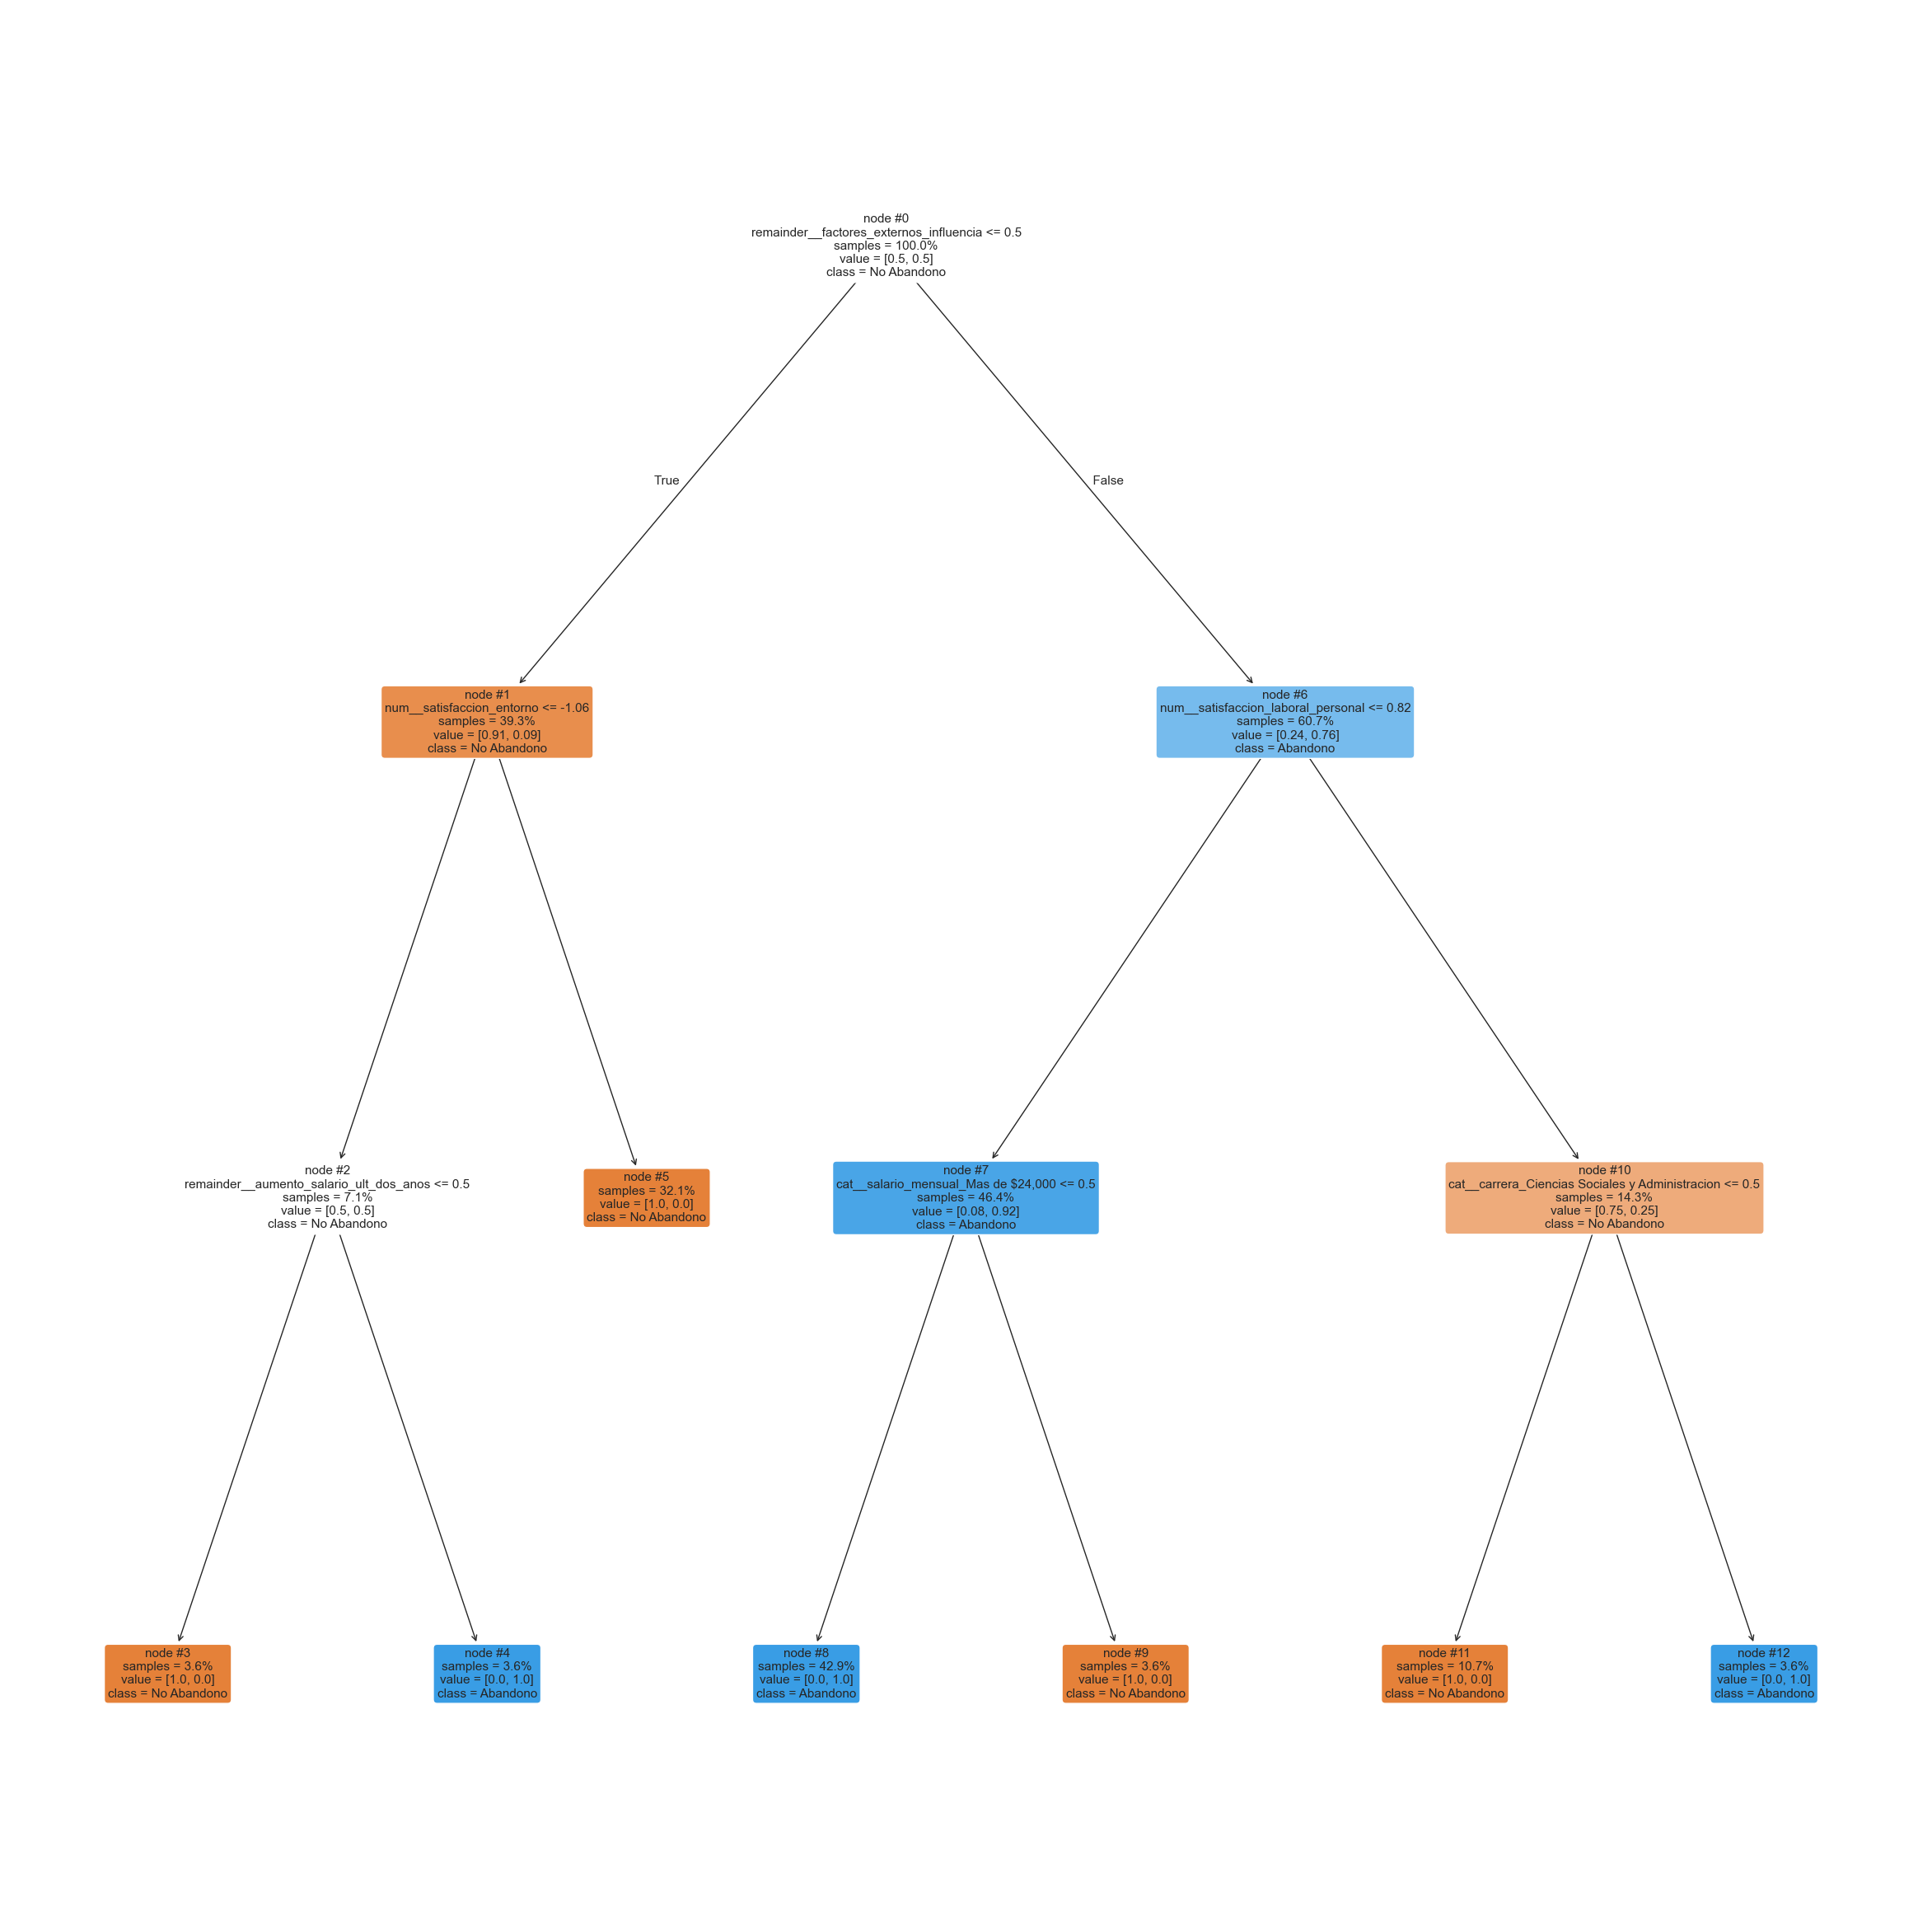

In [186]:
# --- Paso 10: Visualizar el Árbol Entrenado dentro del Pipeline (Opcional) ---
# Si quieres visualizar el árbol que se entrenó al final (en el paso 8).
# Necesitas acceder al modelo entrenado DENTRO del pipeline.

# El modelo DecisionTreeClassifier está en el último paso del pipeline ('classifier')
final_tree_model = pipeline.named_steps['classifier']

# Las feature_names para el plot_tree deben ser los nombres de las features *después* del preprocesamiento
# El preprocessor puede cambiar el número y nombre de columnas (especialmente OHE).
# Obtener los nombres de las features después del preprocesamiento es un poco más complejo.
# Una forma es entrenar el preprocesador por separado y ver sus get_feature_names_out()

# Opción simple (si sabes que OHE genera nombres 'columna_categoria'):
# combined_feature_names = columnas_numericas + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(columnas_categoricas_ohe))
# Ajusta esto según tu ColumnTransformer real si tiene más transformadores o rename_columns.
fitted_preprocessor = pipeline.named_steps['preprocessor']
# Para este ejemplo, usaremos los nombres de columnas de entrenamiento originales como proxy,
# pero ten en cuenta que no coincidirán exactamente con las dummies de OHE.
try:
    feature_names_post_preprocessing = fitted_preprocessor.get_feature_names_out(input_features=X_train.columns.tolist())
    # O simplemente: feature_names_post_preprocessing = fitted_preprocessor.get_feature_names_out()
    # Si te da error, puede que necesites especificar input_features=X_train.columns.tolist()
except AttributeError:
    print("¡Advertencia! get_feature_names_out() no está disponible. Necesitas scikit-learn >= 0.24 para esto.")
    print("Considera actualizar scikit-learn o construir manualmente los nombres de las features post-preprocesamiento.")


print("\nVisualizando el Árbol de Decisión FINAL entrenado...")
plt.figure(figsize = (30,30)) # Ajusta el tamaño según la complejidad del árbol

plot_tree(final_tree_model,
          feature_names=feature_names_post_preprocessing, # Usar nombres originales o los generados post-preprocesamiento
          class_names=['No Abandono', 'Abandono'], # Define los nombres de tus clases
          filled=True,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

plt.show()

In [187]:
# satisfacción_laboral_personal = 0.82
a = 0.82*df_ml['satisfaccion_laboral_personal'].std() + df_ml['satisfaccion_laboral_personal'].mean()
print(f'El umbral de satisfaccion_laboral_personal es {a}')

# antigüedad = -0.76
b = -0.76*df_ml['antigüedad'].std() + df_ml['antigüedad'].mean()
print(f'El umbral de antigüedad es {b}')


El umbral de satisfaccion_laboral_personal es 4.510898011053338


KeyError: 'antigüedad'

In [ ]:
df_ml.T

In [ ]:
opciones_posibles = [
    'Oferta laboral en otras empresas',
    'Distancia entre casa y trabajo',
    'Falta de transporte adecuado',
    'Salario poco competitivo en el mercado',
    'Responsabilidades familiares',
    'Condiciones economicas generales',
    'Falta de oportunidades de crecimiento profesional',
    'Ambiente laboral',
    'Factores personales',
    'otros_motivos'
]

df_sin_opciones = df_ml.drop(opciones_posibles, axis=1)

df_sin_opciones